# Why NumPy Matters

NumPy provides high-performance array operations that are essential for numerical computing.
Learning to use NumPy efficiently helps write code that is both faster and easier to understand.

This part of the tutorial aims to show you how NumPy Is Done Right. NumPy lets us focus on what we compute instead of how we loop over data.

In [1]:
import numpy as np
from scipy import linalg
from scipy.stats import norm
import csv
from matplotlib import pyplot as plt

## Dealing With Arrays
Some slicing commands

In [2]:
z = np.linspace(0, 10, 10 + 1)
n_z = z.size
print('z is', z)

z is [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


First few z numbers

In [3]:
z_first_few = z[:3]
print('First few z numbers are', z_first_few)

First few z numbers are [0. 1. 2.]


Last few z numbers

In [4]:
z_last_few = z[n_z - 3:]
print('Last few few z numbers are', z_last_few)

Last few few z numbers are [ 8.  9. 10.]


Extract out every other element

In [5]:
z_even = z[::2]
print('Even z numbers are', z_even)

Even z numbers are [ 0.  2.  4.  6.  8. 10.]


Extract out every other element of starting at 1

In [6]:
z_odd = z[1::2]
print('Odd z numbers are', z_odd)

Odd z numbers are [1. 3. 5. 7. 9.]


Flip the data in the (N,) array

In [7]:
z_flip = z[::-1]
print('Flip z numbers are', z_flip, '\n\n')

Flip z numbers are [10.  9.  8.  7.  6.  5.  4.  3.  2.  1.  0.] 




## Matrices
Extracting elements (3, 3) array, or a 3 x 3 matrix

In [10]:
A = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
], dtype='float')

### A note on floating-point types in NumPy

The argument `dtype='float'` specifies the data type used to store the array entries.  
In NumPy, `float` corresponds to the **default floating-point precision**, which is typically **64-bit double precision** (`float64`) on most systems.

By default:
- NumPy uses **`float64`** for floating-point arrays.
- This choice offers a good balance between numerical accuracy and performance.

NumPy supports several floating-point data types, including:
- `float16` – half precision (low accuracy, mainly for GPUs)
- `float32` – single precision
- `float64` – double precision (default)
- `float128` – extended precision (platform-dependent)

The choice of data type affects:
- numerical accuracy,
- memory usage,
- and computational performance.

For most numerical methods, `float64` is recommended unless memory or performance constraints require otherwise.

### Back to the Matrix



In [11]:
# a1 is an (3,) array, that being an array of numbers made up from the first column of A
a1 = A[:, 0]

# a2 is a (3, 1) array, a column matrix, that being the first column of A
a2 = A[:, [0]]

# This is (3, 2) array, a 3 x 2 matrix, composed of the first two columns of A
a3 = A[:, 0:2]

# convert (3,) array into a (3, 1) array (i.e., col matrix)
a4 = a1.reshape((3, 1))

# convert (3,) array into a (1, 3) array (i.e., row matrix)
a5 = a1.reshape((1, 3))

print(A)
print(a1)
print(a2)
print(a3)
print(a4)
print(a5)
print(a5[0, :-1])
print('Shape of A is', np.shape(A))
print('Shape of a1 is', np.shape(a1))
print('Shape of a4 is', np.shape(a4))

[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
[1. 4. 7.]
[[1.]
 [4.]
 [7.]]
[[1. 2.]
 [4. 5.]
 [7. 8.]]
[[1.]
 [4.]
 [7.]]
[[1. 4. 7.]]
[1. 4.]
Shape of A is (3, 3)
Shape of a1 is (3,)
Shape of a4 is (3, 1)


## Swap Rows

In [12]:
A[(0, 2), :] = A[(2, 0), :]
b = np.array([[1],
              [2],
              [1]])
A_tilde = np.hstack([A, b])  # see np.vstack, np.block, np.concatenate

## Transpose

In [5]:
A_trans = A.T  # transpose of a matrix
A_sym = 1 / 2 * (A + A_trans)  # matrix addition

## Complex matrices

In [6]:
Ac = np.array([
    [1 + 1j, -6 + 1j],
    [2 - 1j, 4]
], dtype=complex)

Ac_conj = np.conj(Ac)  # complex conjugate
Ac_herm = Ac_conj.T  # complex conjugate transpose
Ac_herm_other = np.conj(Ac).T


## Forming matrices
Using `np.array` 

In [13]:
B = np.array([
    [1, 2, 3],
    [4, 5, 6],
])
print('Shape of B is', np.shape(B))

Shape of B is (2, 3)


Using `np.linspace`

In [ ]:
N = 3
c1 = np.linspace(0, N, N + 1)  # start, end, num-points
c2 = np.linspace(N, 0, N + 1)  # start, end, num-points
C = np.array([
    c1,
    c2,
])
print('Shape of c1 is', np.shape(c1), 'the shape of c2 is',
      np.shape(c2), 'and the shape of C is', np.shape(C))

### Reshaping

Generate the array:

In [14]:
d1 = np.arange(2, 10, 2)  # start, end (exclusive), step
print(type(d1), np.shape(d1))

<class 'numpy.ndarray'> (4,)


Reshape the array into a column vector. The value `-1` tells NumPy to automatically infer the correct size for that dimension based on the total number of elements. Here, a (4,) array is reshaped into a (4, 1) array.

In [15]:
d1 = d1.reshape((-1, 1))
print(type(d1), np.shape(d1))

<class 'numpy.ndarray'> (4, 1)


Same approach. Different array

In [16]:
d2 = np.arange(8, 0, -2)  # start, end (exclusive), step
d2 = d2.reshape((-1, 1))

Note the (-1, 1) means wildcard, so, if d2 is (100,) then d2.reshape(-1, 1) will give you a (100, 1)

Use `np.block`, `np.hstack` and `np.vstack` to correctly form block matries

In [17]:
D = np.block([
    [d1, d2]
])
# or
# D = np.hstack((d1, d2))

print('Shape of d1 is', np.shape(d1), 'the shape of d2 is',
      np.shape(d2), 'and the shape of D is', np.shape(D), '\n\n')

Shape of d1 is (4, 1) the shape of d2 is (4, 1) and the shape of D is (4, 2) 




### Common Matrices
Such as Identitiy, Matrix full of ones, matrix full of zeros

In [18]:
id_matrix = np.eye(3)
zeros_matrix = np.zeros((3, 4))
ones_matrix = np.ones((3, 2))
diag_matrix = np.diag(np.arange(9))

### Matrix multiplication

In [19]:
# Generate a ramdom A matrix with a specific seed
np.random.seed(1234)
A = np.random.normal(0, 1, (3, 3))

x = np.array([
    [1],
    [2],
    [3],
])

b = A @ x

### Solving Ax = b

In [20]:
A = np.array([
    [9, 8, 7],
    [6, -5, 4],
    [-3, 2, -1],
])
b = np.array([
    [-1],
    [2],
    [-3],
])

# x = np.linalg.solve(A, b)
# print(x)
x = linalg.solve(A, b)  # preffered to np.linalg.solve(A, b)
print(x)

[[ 1.60416667]
 [-0.125     ]
 [-2.0625    ]]


###  Eigenvalues

In [21]:
eig_decomp = linalg.eig(A)
lam = eig_decomp[0]  # eigenvalues
V = eig_decomp[1]  # eigenvectors
#  print(lam)
#  print(V)
print('The eigenvalues are \n', lam, end='\n\n')
print('The eigenvectors are \n', V, end='\n\n')

The eigenvalues are 
 [10.26936771+0.j -8.3843277 +0.j  1.11495999+0.j]

The eigenvectors are 
 [[-0.92953704 -0.27035253 -0.61153658]
 [-0.31508134  0.89591397 -0.08551031]
 [ 0.19153235 -0.35248782  0.78658184]]



### SVD

In [22]:
U_np, Sigma_np, V_np_trans = np.linalg.svd(A, full_matrices=True)

print('U from numpy is\n', U_np, '\n')
print('Sigma from numpy is\n', Sigma_np, '\n')
print('V from numpy is\n', V_np_trans.T, '\n\n')

U from numpy is
 [[-0.93539258  0.35360403  0.00221703]
 [-0.32550795 -0.86348534  0.38527606]
 [ 0.13814954  0.35966271  0.9227987 ]] 

Sigma from numpy is
 [14.53526945  8.55157592  0.77232837] 

V from numpy is
 [[-0.74205914 -0.35987097 -0.56554497]
 [-0.38384578  0.91978185 -0.08163191]
 [-0.54955496 -0.15650634  0.82066748]] 




## Random numbers and probability distributions

In this section, we generate random samples from common probability distributions and compare
their empirical properties (mean, standard deviation, histogram) with the theoretical expectations.

#### Gaussian (normal) distribution

We start by generating random samples from a normal distribution with a given mean and
standard deviation. We then verify that the sample statistics converge to the expected values.

In [23]:
# Set random seed for reproducibility
np.random.seed(123321)

# Parameters of the normal distribution
mu, sigma = 5.0, 2.0

# Draw samples
normal_data = np.random.normal(mu, sigma, 100_000)

# Estimate mean and standard deviation from the data
mu_data, std_data = norm.fit(normal_data)

print("Estimated mean and standard deviation:")
print(mu_data, std_data, "\n")

# Compare with direct NumPy estimates
print("NumPy mean and standard deviation:")
print(np.mean(normal_data), np.std(normal_data), "\n")

Estimated mean and standard deviation:
5.00936054128837 2.006376531957527 

NumPy mean and standard deviation:
5.00936054128837 2.006376531957527 



We now visualize the distribution using a histogram and overlay the analytical probability
density function (PDF) of the normal distribution.

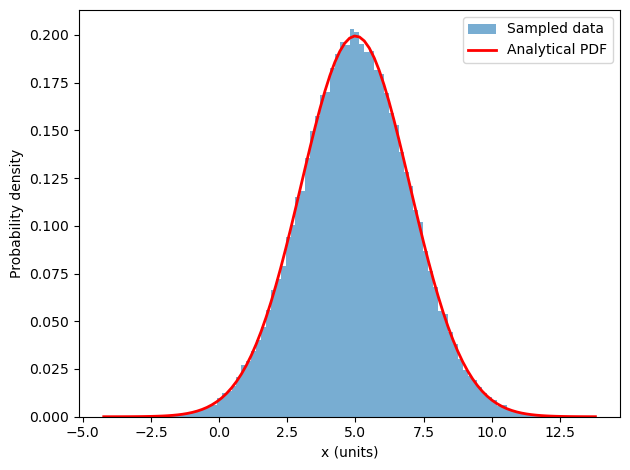

In [24]:
# Plot histogram and analytical PDF
N_bins = 100

fig, ax = plt.subplots()
count, bins, patches = ax.hist(
    normal_data, N_bins, density=True, alpha=0.6, label="Sampled data"
)

# Analytical normal distribution
pdf = (
    1 / (sigma * np.sqrt(2 * np.pi))
    * np.exp(-(bins - mu) ** 2 / (2 * sigma**2))
)

ax.plot(bins, pdf, 'r', linewidth=2, label="Analytical PDF")

ax.set_xlabel("x (units)")
ax.set_ylabel("Probability density")
ax.legend()
fig.tight_layout()

#### Uniform distribution

Next, we generate samples from a uniform distribution and again compare the empirical
statistics with the theoretical ones.

In [25]:
# Set random seed for reproducibility
np.random.seed(1234321)

# Parameters of the uniform distribution
x_min, x_max = -2, 2
N_samples = 100_000

# Draw samples
uniform_data = np.random.uniform(x_min, x_max, N_samples)

# Print empirical statistics
print("Mean and standard deviation of uniform data:")
print(np.mean(uniform_data), np.std(uniform_data), "\n")

Mean and standard deviation of uniform data:
0.0019372838830313177 1.154666577132715 



The probability density of a uniform distribution is constant over its interval.
We compare this analytical result with the histogram of the sampled data.

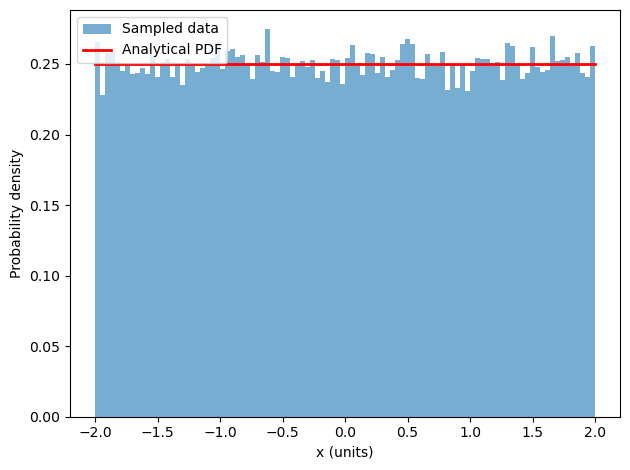

In [26]:
# Plot histogram and analytical PDF
fig, ax = plt.subplots()
count, bins, patches = ax.hist(
    uniform_data, N_bins, density=True, alpha=0.6, label="Sampled data"
)

# Analytical uniform PDF
ax.plot(
    bins,
    np.ones_like(bins) / (x_max - x_min),
    'r',
    linewidth=2,
    label="Analytical PDF"
)

ax.set_xlabel("x (units)")
ax.set_ylabel("Probability density")
ax.legend()
fig.tight_layout()

plt.show()

### Saving data to CSV files

Numerical results are often stored for later analysis or visualization.  
Below are two common ways to write data to a CSV file in Python.

In [27]:
# Generate sample data
t = np.arange(0.0, 1.0, 0.1)
x = t**2

# Combine data into a single 2D array (columns: t, x)
data = np.column_stack((t, x))

#### Method 1: Using Python’s built-in `csv` module

This approach offers full control over formatting and headers, and does not
require NumPy-specific functionality.

In [28]:
# Write CSV file using the csv module
with open("data_file.csv", "w", newline="") as fp:
    writer = csv.writer(fp, delimiter=",")
    writer.writerow(["Time", "x^2"])  # header
    writer.writerows(data)

#### Method 2: Using NumPy’s `savetxt`

This is a concise and convenient method when working primarily with NumPy arrays.

In [29]:
# Write CSV file using NumPy
np.savetxt(
    "data_file2.csv",
    data,
    fmt="%.8f",
    delimiter=",",
    header="Time, x^2",
    comments=""
)

### Reading data from a CSV file

After saving data to disk, it is often necessary to load it again for further
processing or visualization. NumPy provides convenient functions for reading
text-based data files such as CSV files.

In [30]:
data_read = np.loadtxt(
    "data_file.csv",
    dtype=float,
    delimiter=",",
    skiprows=1,      # skip header line
    usecols=(0, 1)   # read first two columns
)

print(data_read)

[[0.   0.  ]
 [0.1  0.01]
 [0.2  0.04]
 [0.3  0.09]
 [0.4  0.16]
 [0.5  0.25]
 [0.6  0.36]
 [0.7  0.49]
 [0.8  0.64]
 [0.9  0.81]]
